## Reinforcement Learning
F. Burkholder 11/06/18

Notebook features material from [Adventures in Machine Learning](http://adventuresinmachinelearning.com/reinforcement-learning-tutorial-python-keras/), [Wikipedia](https://en.wikipedia.org/wiki/Reinforcement_learning), and [Towards Data Science.](https://towardsdatascience.com/applications-of-reinforcement-learning-in-real-world-1a94955bcd12)

Reinforcement learning can be considered a third type of machine learning:  
* Supervised learning: From features predict a target.
* Unsupervised learning: Find structure in the data.
* Reinforcement learning: Let an **agent** interact with an **environment** and use feedback from the environment to train its behavior.  Some call this semi-supervised.  

Reinforcement learning (RL) hasn't always been assisted by deep learning (neural networks).  But a fundamental challenge of RL has been how to represent data.  Deep learning is very good at engineering features to represent data.  

A more exact definition of RL:  

In RL an **agent** is placed in an **environment** where it receives **rewards** for its **actions** depending what **state** the **agent** and **environment** are in.  

For an example, watch this [YouTube video](https://www.youtube.com/watch?v=XiigTGKZfks) of the classic [control theory pole balancing problem.](https://pdfs.semanticscholar.org/3dd6/7d8565480ddb5f3c0b4ea6be7058e77b4172.pdf)

In the cart pole video...  
<br>
What is the **agent**?
<details><summary>
solution…
</summary>
The cart
</details>  
What is the **environment**?  
<details><summary>
solution…
</summary>
The track constraining the cart's motion, gravity.
</details>  
What **actions** can the agent take?  
<details><summary>
solution…
</summary>
The cart can move left or right.
</details>  
What is the **reward**?  
<details><summary>
solution…
</summary>
Some value (+1, +10?!?) associated with keeping the pole upright. 
</details> 
<br>
What is the **state**?  
<details><summary>
solution…
</summary>
The position of the cart on the track.  
The linear velocity of the cart.  
The angle of the pole.  
The angular velocity of the pole.
</details>   
Would you describe this as a deterministic approach?  Or was it more trial and error?    
<details><summary>
solution…
</summary>
Trial and error.  Episodes were spent **exploring** the effect of taking certain **actions** at certain **states** in the **environment**, and as the **agent** associated **rewards** with certain **actions** at certain **states** it **exploited** this knowledge to keep the pole upright to **maximize its reward.** 
</details> 

Likely you've heard about RL before, but in the context of learning to play games:  
[Playing Atari with Deep Reinforcement Learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)  
[AlphaGo vs Lee Seedol in Go](https://www.youtube.com/watch?v=rOL6QJdAlm8) (not RL at the time)  
[AlphaGo Zero (RL!) destroys AlphaGo](https://deepmind.com/blog/alphago-zero-learning-scratch/)  

But don't think RL is just limited to games.  As Koray Kavukcuoglu, the director of DeepMind, said at a conference:  

  "If one of the goals that we work for here is AI then it[RL] is at the  
   core of that. Reinforcement Learning is a very general framework  
   for learning sequential decision making tasks. And Deep Learning,  
   on the other hand, is of course the best set of algorithms we have  
   to learn representations. And combinations of these two different  
   models is the best answer so far we have in terms of learning very  
   good state representations of very challenging tasks that are not  
   just for solving toy domains but actually to solve challenging real  
   world problems."  

Current applications for RL:  
* Traffic light control
* Robotics
* Web system configuration
* Bidding and advertising


Diagram of relationship between agent, actions, environment, reward, and state in RL.  
<img src="images/RL_Diagram.png" width="400">

## **If you aren't already running this notebook in your tensorflow container, I'd recommend changing that**

In your terminal:
```
$ docker start tensorflow 
$ docker logs tensorflow  
```
Go to localhost:8888 in your browser (or 0.0.0.0:8888, they're the same thing!)

Copy the token from the ```docker logs tensorflow``` command and use it to login to your jupyter environment

## Installation pre-requisites
Before we install the proper libraries, we must make sure we're inside the container.
```
$ docker exec -it tensorflow bash
```

Now let's install the reinforcement learning library, OpenAI's Gym, in your container.
```  
$ pip install gym  
```

For the assignment later, consider downloading some of Gym's other environment dependencies
```
$ pip install gym[atari]
$ pip install gym[box2d]
```

We need to define everything mathematically and algorithmically in code.  Let's do it through an example, with an environment defined by [OpenAI Gym.](https://gym.openai.com/) 

We're going to use the `NChain-v0` environment in OpenAi Gym.  Here's a diagram summarizing the environment:

<img src="./images/NChain-v0.png" width="800">

In [1]:
import numpy as np
import gym
env = gym.make('NChain-v0')

In [2]:
env.reset?

Signature: env.reset(**kwargs)
Docstring:
Resets the environment to an initial state and returns an initial
observation.

Note that this function should not reset the environment's random
number generator(s); random variables in the environment's state should
be sampled independently between multiple calls to `reset()`. In other
words, each call of `reset()` should yield an environment suitable for
a new episode, independent of previous episodes.

Returns:
    observation (object): the initial observation.
File:      ~/opt/anaconda3/lib/python3.7/site-packages/gym/wrappers/time_limit.py
Type:      method


In [3]:
obs = env.reset()
print("The agent is in state {0}.".format(obs))

The agent is in state 0.


In [4]:
env.step?

Signature: env.step(action)
Docstring:
Run one timestep of the environment's dynamics. When end of
episode is reached, you are responsible for calling `reset()`
to reset this environment's state.

Accepts an action and returns a tuple (observation, reward, done, info).

Args:
    action (object): an action provided by the agent

Returns:
    observation (object): agent's observation of the current environment
    reward (float) : amount of reward returned after previous action
    done (bool): whether the episode has ended, in which case further step() calls will return undefined results
    info (dict): contains auxiliary diagnostic information (helpful for debugging, and sometimes learning)
File:      ~/opt/anaconda3/lib/python3.7/site-packages/gym/wrappers/time_limit.py
Type:      method


In [5]:
obs, reward, done, _ = env.step(env.action_space.sample())

In [6]:
action = 0
new_obs, reward, done, _ = env.step(action)
print("The agent took action {0}.".format(action))
print("The agent is now in state {0}.".format(new_obs))
print("The reward was {0}.".format(reward))
print("Is the episode finished? {0}".format(done))

The agent took action 0.
The agent is now in state 2.
The reward was 0.
Is the episode finished? False


In [7]:
action = 1
new_obs, reward, done, _ = env.step(action)
print("The agent took action {0}.".format(action))
print("The agent is now in state {0}.".format(new_obs))
print("The reward was {0}.".format(reward))
print("Is the episode finished? {0}".format(done))

The agent took action 1.
The agent is now in state 0.
The reward was 2.
Is the episode finished? False


### A naive heuristic (educated guess, rule of thumb) for reinforcement learning

We need to find a **policy $\pi$** which maps **states**, **actions**, and **rewards** in such a way that **the cumulative award is maximized** in the episode.  

Imagine a **reward table**  

|state|  action 0 | action 1 |
|---|:---:|:---:|
| 0 | $\sum_{step=1}^{N} r_{a0}$  | $\sum_{step=1}^{N} r_{a1}$  | 
| 1 | $\sum_{step=1}^{N} r_{a0}$ | $\sum_{step=1}^{N} r_{a1}$   | 
| 2 |  $\sum_{step=1}^{N} r_{a0}$  | $\sum_{step=1}^{N} r_{a1}$  | 
| 3 |$\sum_{step=1}^{N} r_{a0}$  | $\sum_{step=1}^{N} r_{a1}$  | 
| 4 | $\sum_{step=1}^{N} r_{a0}$  | $\sum_{step=1}^{N} r_{a1}$  | 

where a simulation fills in the values in this table.  
Do this with Python:

In [22]:
def naive_sum_reward_agent(env, num_episodes=100):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    # this is the table that will hold our summated rewards for
    # each action in each state
    r_table = np.zeros((num_states, num_actions))
    for g in range(num_episodes):
        if g % 25 == 0: 
            print("Episode {0}".format(g))
        obs = env.reset()
        done = False
        while not done:
            if np.sum(r_table[obs, :]) == 0:
                # make a random selection of actions
                action = np.random.randint(0, num_actions) # Explore
            else:
                # select the action with highest cummulative reward
                action = np.argmax(r_table[obs, :]) # Exploit
            new_obs, reward, done, _ = env.step(action)
            r_table[obs, action] += reward
            obs = new_obs
    return r_table

In [23]:
def print_table(tabl):
    '''Prints table with row and column headers'''
    print("State\ta0\ta1")
    print("-"*25)
    for s, row in enumerate(tabl):
        print("{0}\t{1:0.1f}\t{2:0.1f}".format(s, row[0], row[1]))

In [24]:
env.reset()
num_episodes = 1000
naive_reward_table = naive_sum_reward_agent(env, num_episodes)
print("\nThe naive reward table after {0} episodes is:".format(num_episodes))
print_table(naive_reward_table)
# try executing this cell several times to compare differences in results

Episode 0
Episode 25
Episode 50
Episode 75
Episode 100
Episode 125
Episode 150
Episode 175
Episode 200
Episode 225
Episode 250
Episode 275
Episode 300
Episode 325
Episode 350
Episode 375
Episode 400
Episode 425
Episode 450
Episode 475
Episode 500
Episode 525
Episode 550
Episode 575
Episode 600
Episode 625
Episode 650
Episode 675
Episode 700
Episode 725
Episode 750
Episode 775
Episode 800
Episode 825
Episode 850
Episode 875
Episode 900
Episode 925
Episode 950
Episode 975

The naive reward table after 1000 episodes is:
State	a0	a1
-------------------------
0	0.0	1122708.0
1	56456.0	0.0
2	0.0	179016.0
3	0.0	36070.0
4	190142.0	0.0


Problems with this approach:  
* We aren't exploring both actions at each state.
* We know that the best solution is to take action 0 all the way to state 4 and then continue to take action 0 there, but the table above isn't showing that (most time is spent in state 0).
* This approach only sums immediate awards for an action taken in a given state.  It has no mechanism for accounting for a delayed reward (picking action 0 with no reward until state 4).

### Accounting for a delayed reward: Q-learning
The idea of propagating possible reward from the best possible actions in future states is a core component of what is called Q learning.  
Here is the Q-learning update rule:
<img src="./images/Q_learning.png" width="800">
and $\gamma$ is a discount factor (0 < $\gamma$ $\leq$ 1) associated with how much to weight future rewards.  
The max $Q(s_{t+1},a_{t+1})$ is the maximum Q value obtained from any action in that state.  
[source](https://en.wikipedia.org/wiki/Q-learning)

Instead of making a **reward table**, we'll make a **Q table**.

In [11]:
def q_update(old_q, new_q, reward, lr=0.8, gamma=0.95):
    return (1 - lr) * old_q + lr * (reward + gamma * np.max(new_q))

In [13]:
def q_learning_with_table(env, num_episodes=100):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    q_table = np.zeros((num_states, num_actions))
    gamma = 0.95 # discount factor
    lr = 0.8 # learning rate
    for i in range(num_episodes):
        if i % 25 == 0: 
            print("Episode {0}".format(i))
        obs = env.reset()
        done = False
        while not done:
            if np.sum(q_table[obs,:]) == 0:
                # make a random selection of actions
                action = np.random.randint(0, num_actions)
            else:
                # select the action with largest q value in state s
                action = np.argmax(q_table[obs, :])
            new_obs, reward, done, _ = env.step(action)      
            q_table[obs, action] = q_update(q_table[obs, action], q_table[new_obs, :], reward, lr, gamma)
            obs = new_obs
    return q_table

In [25]:
env.reset()
num_episodes = 200
q_learning_table = q_learning_with_table(env, num_episodes)
print("\nThe q learning table after {0} episodes is:".format(num_episodes))
print_table(q_learning_table)
# try executing this cell several times to compare differences in results

Episode 0
Episode 25
Episode 50
Episode 75
Episode 100
Episode 125
Episode 150
Episode 175

The q learning table after 200 episodes is:
State	a0	a1
-------------------------
0	0.0	19.3
1	18.8	0.0
2	0.0	20.8
3	0.0	19.8
4	20.7	0.0


Better, but still have the problem that it isn't exploring all actions in each state.  
Let's use an *epsilon - greedy* approach where a random number less than *epsilon* forces the algorithm to **explore**.  Otherwise it will **exploit**.

In [15]:
def eps_greedy_q_learning_with_table(env, num_episodes=100):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    q_table = np.zeros((num_states, num_actions))
    gamma = 0.95 # discount factor
    eps = 0.5 # epsilon-greed explore threshold
    lr = 0.8 # learning rate
    decay_factor = 0.99999 # as time goes on, decrease willingness to explore
    for i in range(num_episodes):
        if i % 25 == 0: 
            print("Episode {0}".format(i))
        obs = env.reset()
        eps *= decay_factor
        done = False
        while not done:
            # select the action with highest cummulative reward
            if np.random.random() < eps or np.sum(q_table[obs, :]) == 0:
                action = np.random.randint(0, num_actions)
            else:
                action = np.argmax(q_table[obs, :])
            new_obs, reward, done, _ = env.step(action)
            q_table[obs, action] = q_update(q_table[obs, action], q_table[new_obs, :], reward, lr, gamma)
            obs = new_obs
    return q_table

In [21]:
env.reset()
num_episodes = 500
q_learning_eps_greed_table = eps_greedy_q_learning_with_table(env, num_episodes)
print("\nThe q learning table using epsilon to explore/exploit after {0} episodes is:".format(num_episodes))
print_table(q_learning_eps_greed_table)
# try executing this cell several times to compare differences in results

Episode 0
Episode 25
Episode 50
Episode 75
Episode 100
Episode 125
Episode 150
Episode 175
Episode 200
Episode 225
Episode 250
Episode 275
Episode 300
Episode 325
Episode 350
Episode 375
Episode 400
Episode 425
Episode 450
Episode 475

The q learning table using epsilon to explore/exploit after 500 episodes is:
State	a0	a1
-------------------------
0	39.5	41.1
1	40.8	41.4
2	40.8	41.4
3	47.4	39.2
4	44.2	46.8


If everything worked out, the Q values under action 0 should be larger than action 1 for all states.  Therefore, the best **policy** to **maximize our cumulative reward** is to choose action 0 in every state.  

This is a simple environment, so a simulation like this can be performed to find the Q values and determine the best policy.  But most likely the environment is more complicated that this, with more states and actions possible at each state.

However, neural networks can be trained to predict Q values for each action in a given state in more complicated problems.  Deep learning to the rescue!

## Reinforcement Learning with Keras

To develop a neural network which can perform Q learning, the input needs to be the current state (plus potentially some other information about the environment) and it needs to output the relevant Q values for each action in that state. The Q values which are output should approach, as training progresses, the values produced in the Q learning updating rule. Therefore, the loss or cost function for the neural network should be:  
<img src="./images/loss_rl_dl.png" width="400">  
and we'll use this architecture:  
<img src="images/rl_arch.png" width="500">

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import matplotlib.pylab as plt
import matplotlib as mpl
plt.style.use("ggplot") # always make it pretty
mpl.rcParams['font.size'] = 16 # Frank was here
mpl.rcParams['figure.figsize'] = 10, 8

In [18]:
def q_learning_keras(env, num_episodes=150):
    num_actions = env.action_space.n
    num_states = env.observation_space.n
    
    # create matrix of model-interpretable states
    obs_states = np.identity(num_states)
    
    # create the model
    model = Sequential()
    model.add(InputLayer(batch_input_shape=(1, num_states)))
    model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(num_actions, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # now execute the q learning
    gamma = 0.95
    eps = 0.5
    decay_factor = 0.999
    r_avg_list = []
    for i in range(num_episodes):
        obs = env.reset()
        eps *= decay_factor
        if i % 25 == 0:
            print("Episode {} of {}".format(i, num_episodes))
        done = False
        reward_sum = 0
        while not done: 
            if np.random.random() < eps:
                action = np.random.randint(0, num_actions)
            else:
                action = np.argmax(model.predict(obs_states[obs:obs + 1]))
            new_obs, reward, done, _ = env.step(action)
            target_q = reward + gamma * np.max(model.predict(obs_states[new_obs:new_obs + 1]))
            target_vec = model.predict(obs_states[obs:obs + 1])[0]
            target_vec[action] = target_q
            model.fit(obs_states[obs:obs + 1], target_vec.reshape(-1, num_actions), epochs=1, verbose=0)
            obs = new_obs
            reward_sum += reward
        r_avg_list.append(reward_sum / 1000)
    plt.plot(r_avg_list)
    plt.ylabel('Average reward per episode')
    plt.xlabel('Number of episodes')
    plt.show()
    prediction_table = np.zeros((num_states, num_actions))
    for i in range(num_states):
        prediction_table[i] = model.predict(obs_states[i:i + 1])[0]
    print_table(prediction_table)       

Episode 0 of 150
Episode 25 of 150
Episode 50 of 150
Episode 75 of 150
Episode 100 of 150
Episode 125 of 150


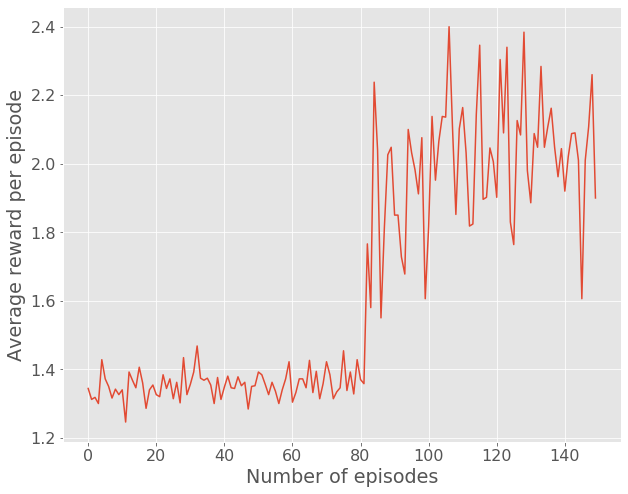

State	a0	a1
-------------------------
0	58.5	57.1
1	61.8	58.5
2	66.1	59.6
3	71.8	60.6
4	79.1	64.3


In [19]:
env.reset()
q_learning_keras(env)

Other environments are available in OpenAI Gym: [environments](https://gym.openai.com/envs/)  
Solutions to some of these environments can be found on the OpenAI [Leaderboard](https://github.com/openai/gym/wiki/Leaderboard)  
You can also make your own environment: [Guide](https://github.com/openai/gym/tree/master/gym/envs)

To be able to save recordings of our training, we'll need some stuff to trick our docker environment into thinking it has a screen. It's not generally an easy process to include recording with your environments, hence why this is a footnote. 

You'll need to run the following command in your docker container (bash prompt!) to download the necessary dependencies

```
$ apt-get -y update && apt-get -y install xvfb ffmpeg python-opengl
```